# Fraud detection model

Importing the important initial libraries for reading the excel file (csv) 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [40]:
data = pd.read_csv("C:\\Users\\Dell\\Desktop\\projects\\Untitled Folder\\Fraud.csv", encoding= ('unicode_escape'))

After loading the dataset, Checking for missing values for initial EDA and to start data cleaning

In [3]:
print('Data does not have any NULL value.')
data.isnull().any()

Data does not have any NULL value.


step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

No missing values so we can proceed, Let's see what the dataset looks like!

In [4]:
data.head(10) 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Data does not have missing or null values hence data does not require cleaning for that
The data given here has the variables isFraud and isFlaggedFraud depicting that the actual Fraud status has been noted. We can use this data to train our model.

In [5]:
data.info() # to help understand the data types for each 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.describe() #to get a statistical overview of the dataset

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]

In [8]:
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

In [9]:
print('The total number of fraud transaction is {}.'.format(data.isFraud.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(data.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))

The total number of fraud transaction is 8213.
The total number of fraud transaction which is marked as fraud 16.
Ratio of fraud transaction vs non-fraud transaction is 1:773.


In [43]:
print('Thus in every 773 transaction there is 1 fraud transaction happening.')
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))

Thus in every 773 transaction there is 1 fraud transaction happening.
Amount lost due to these fraud transaction is $12056415427.


In [10]:
print('Data does not have any NaN value.')
data.isna().any()#no data cleaning required but outliers and multicolinearity observed through other ways

Data does not have any NaN value.


step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

Text(0, 0.5, 'Amount')

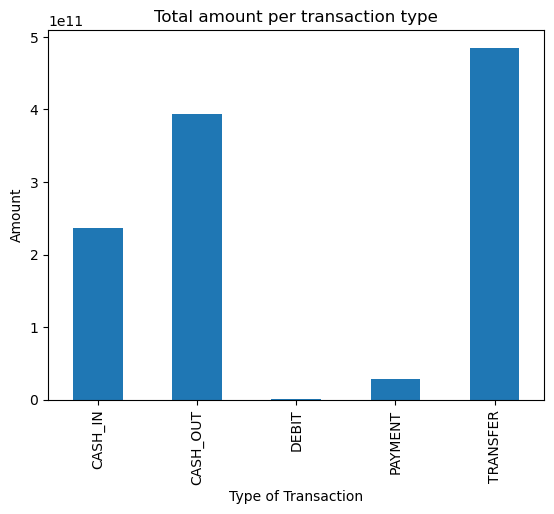

In [11]:
var = data.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount')

Tranfer and cash_out seem to be the most common ways of transaction and they happen to be the most common ways to commit fraud as well

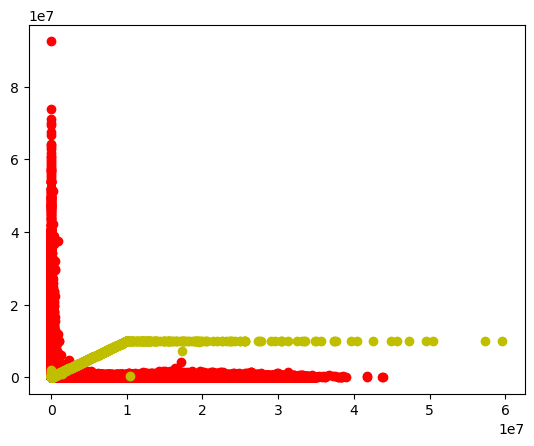

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='r')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='y')
plt.show()

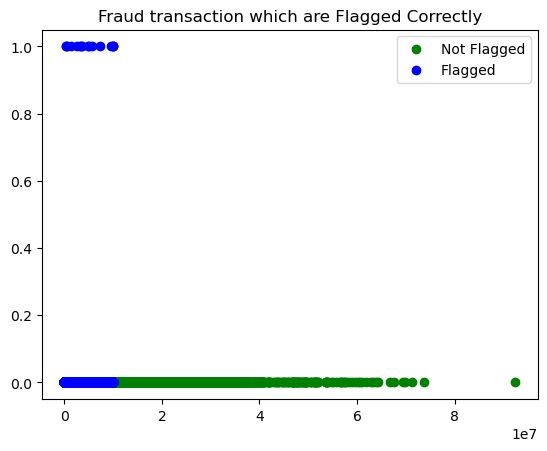

In [13]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='g')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='b')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

The above plot depicts the need for a system which is fast and reliable to mark the fraudulent transaction. The current system is not able to identify and label the fraudulent transactions. We need to check the connection between the features themselves as well.

In [14]:
#for multicollinearity, we make the correlation matrix: 
import pandas as pd
import numpy as np

columns_corr = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
                       'oldbalanceDest', 'newbalanceDest', 'isFraud']


correlated_column = data[columns_corr]

# Calculate the correlation matrix
correlation_matrix = correlated_column.corr()

# Print the correlation matrix
print(correlation_matrix)


C:\Users\Dell\AppData\Local\Temp\ipykernel_23820\3695544526.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlated_column.corr()


                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   

                oldbalanceDest  newbalanceDest   isFraud  
step                  0.027665        0.025888  0.031578  
amount                0.294137        0.459304  0.076688  
oldbalanceOrg         0.066243        0.042029  0.010154  
newbalanceOrig        0.067812        0.041837 -0.008148  
oldbalanceDest        1.000000        0.976569 -0.005885  
newbalanceDest        0.976569        1.000000  0.000535  
isFraud              -0.005885    

The correlation matrix shows the pairwise correlation coefficients between the selected variables. The correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.

Positive correlation means that when one variable increases, the other tends to increase as well, while negative correlation means that when one variable increases, the other tends to decrease. A correlation coefficient close to 0 suggests little to no linear relationship between the variables.

By examining the correlation matrix, you can identify if there are strong correlations between any of the variables in your dataset, which may indicate the presence of multicollinearity. If you observe high correlation values between some variables, further investigation may be necessary to handle multicollinearity properly when building predictive models.

Multicollinearity is a statistical concept that refers to a high degree of correlation between two or more independent variables (predictor variables) in a regression model. In other words, it occurs when there are strong linear relationships among the independent variables, making it difficult to distinguish the individual effects of each variable on the dependent variable (response variable).

Multicollinearity can cause several issues in regression analysis:

Unreliable Coefficients: When independent variables are highly correlated, it becomes challenging for the model to determine the independent contribution of each variable. The coefficients of the correlated variables may fluctuate erratically with changes in the data.

Reduced Model Interpretability: It becomes difficult to interpret the coefficients of the correlated variables because their effects are confounded, and it's unclear how much each variable influences the dependent variable independently.

Increased Standard Errors: The standard errors of the regression coefficients can become very large, which affects the precision of the coefficient estimates and reduces the statistical significance.

Inflated Variance Inflation Factor (VIF): The VIF is a measure used to detect multicollinearity. High VIF values indicate that there is a high correlation between independent variables, which could be problematic for the regression model.

Overfitting: Multicollinearity may lead to overfitting of the model, where the model fits the training data well but performs poorly on new, unseen data.

Detecting multicollinearity is important, and there are several methods to identify it:

Correlation Matrix: Calculate the correlation matrix among the independent variables. High correlation coefficients (close to +1 or -1) indicate potential multicollinearity.

Variance Inflation Factor (VIF): Calculate the VIF for each independent variable. VIF values greater than 5 or 10 (some sources suggest different thresholds) are often considered indicative of multicollinearity.

Eigenvalues: Check the eigenvalues of the correlation matrix. If there is at least one eigenvalue that is close to zero, it suggests multicollinearity.

To address multicollinearity, one can take the following steps:

Remove or Combine Variables: If two or more variables are highly correlated, consider removing one of them from the model or combining them into a composite variable.

Feature Selection: Use feature selection techniques to choose the most relevant and uncorrelated variables for the model.

Principal Component Analysis (PCA): Apply PCA to reduce the dimensionality of the data while retaining most of the information.

Handling multicollinearity appropriately helps to build more reliable and interpretable regression models that provide meaningful insights and predictions.

C:\Users\Dell\AppData\Local\Temp\ipykernel_23820\1825487473.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='coolwarm');


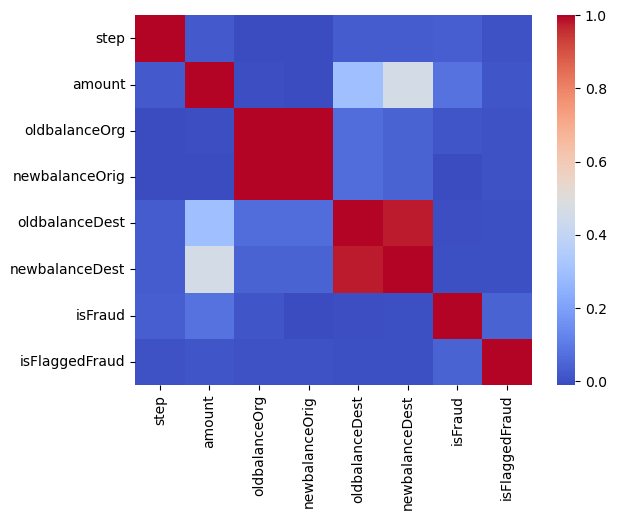

In [16]:
sns.heatmap(data.corr(),cmap='coolwarm');

The heatmap above is depicting : that the columns OldbalanceOrg and NewbalanceOrg are highly correlated. Also, OldbalanceDest and NewbalanceDest are highly correlated. Amount is correlated with isFraud(Target Variable).
Features are not correlated that much, so we observe  the relationship between the type of transaction and amount.

In [17]:
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]

In [18]:
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

C:\Users\Dell\AppData\Local\Temp\ipykernel_23820\1254854079.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fraud.corr(),cmap='coolwarm',);


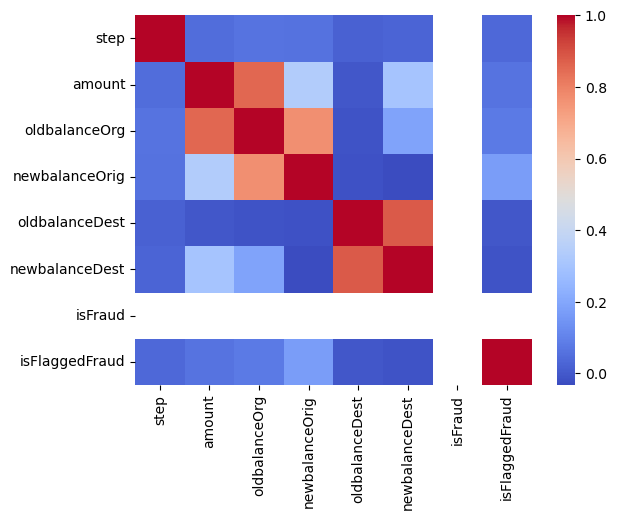

In [19]:
sns.heatmap(fraud.corr(),cmap='coolwarm',);

Q2 and 3 : There are 2 features which stand out: isFraud and isFlaggedFraud column. From the hypothesis, isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the system prevents the transaction due to some thresholds being triggered. We first change the categorical variables to numerical variables for calculation purpose. We then separate the table into X and Y variables to train the machine. The random forest classifier creates multiple decision trees during the training phase and then combines their prediction to make the final prediction. 15 decision trees created here. We then Fit (train) the Random Forest classifier on the training data (train_X and train_y) and then predict the labels for the testing data (test_X).

In [20]:
import pickle

In [21]:
data_replace = data.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,
                                            'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1}) #this step helps us to remove the variables which cannot be used during calculation since it is a categorical variable therefor we convert it into a numerical variable

In [23]:
data_replace.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [29]:
datatotrain=data_replace

In [30]:
datatotrain.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [31]:
X = datatotrain.drop(['isFraud'],axis=1)
y = datatotrain[['isFraud']]

In [32]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

In [34]:
if True:
    probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)

In [35]:
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(test_y,probabilities))

0.7649806095734424


Model Evaluation: average_precision_score: Import the average_precision_score metric from Scikit-learn, which is used to evaluate the model's performance.
average_precision_score(test_y, probabilities): Compute the average precision score by comparing the true labels in test_y with the predicted probabilities in probabilities.The average precision score is a metric commonly used in imbalanced classification tasks, such as fraud detection, where one class (fraudulent transactions) is much rarer than the other (non-fraudulent transactions). It takes into account the precision-recall trade-off and provides a single-value summary of the model's ability to rank fraudulent instances higher than non-fraudulent instances.

A higher average precision score indicates better model performance, with a maximum value of 1.0 indicating perfect classification. The output of average_precision_score will be a number between 0 and 1, representing the model's performance on the test data.

In [37]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the model
accuracy = accuracy_score(test_y, probabilities)
print("Accuracy:", accuracy)

Accuracy: 0.9996872357613688


In [42]:
# Get feature importance from the model
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Sorting the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Displaying the top features that predict fraudulent customers
print("Top features predicting fraud:")
print(feature_importance_df.head())

Top features predicting fraud:
          Feature  Importance
3   oldbalanceOrg    0.333914
6  newbalanceDest    0.191076
1            type    0.144760
2          amount    0.135289
0            step    0.101177


Q5 and 6 : Key factors : The feature importances attribute of the RandomForestClassifier helps us to get an array of importance scores for each feature. The higher the score, the greater is the importance of the feature in predicting fraud. By creating a DataFrame and sorting the features based on importance,we can easily identify the key factors that predict fraudulent customers.
Since from the above visualization analysis we have already observed that speed(step), type of transaction, amount, destination and initial balance before fraud are essential in flagging the fraudulent transaction. These make sense as we have seen in the visualization.

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
# Form the confusion matrix
cm = confusion_matrix(test_y, probabilities)

# Display the confusion matrix
confusion_df = pd.DataFrame(cm, index=['Actual Non-Fraud', 'Actual Fraud'], columns=['Predicted Non-Fraud', 'Predicted Fraud'])
print("\nConfusion Matrix:")
print(confusion_df)


Confusion Matrix:
                  Predicted Non-Fraud  Predicted Fraud
Actual Non-Fraud              1270803               33
Actual Fraud                      365             1323


Q7 and 8: First off, the systems flagging the transactions should be faster.(Incidence response plans)
Frequent security assessment and audit required (frequent audits for compliance)
Implement strong access control (as most fraud cases here in cash and transfer)
Stronger security protocols 
Employee training and user awareness

To check whtether these steps are working there is need to :
Keep updating security infrastructure
ensure compliance of protocols
Encourage employee feedback and reporting 
Continuous monitoring and breach-incident thorough analysis etc.